<a href="https://colab.research.google.com/github/LucianoBV/Procesamiento-del-habla/blob/main/TEMA_3_MODELADO_DE_TEMAS_CON_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROCESAMIENTO DEL HABLA**
# DESAFÍO OBLIGATORIO FINAL MARTÍN FIERRO
**DOCENTE:** Ingeniera en Sistemas de Información Ana Laura Diedrichs

**ALUMNO:** Vargas Luciano Benjamín



# PRESENTACION DEL DATA SET
Para este proyecto vamos a utilizar el libro gauchesco "EL Martín Fierro".


### Descargamos los archivos desde la url

In [ ]:
!pip install pdfplumber

In [ ]:
import requests # para descargar el archivo PDF.
import os
import pdfplumber # para extraer texto de archivos PDF.

In [ ]:
#creo la variable url
url = "https://www.argentina.gob.ar/sites/default/files/hernandez_jose_-_el_gaucho_martin_fierro.pdf"

#hago el get y guardo la respuesta
response = requests.get(url)

#si la respuesta es ok, abro el archivo, descargo los datos y con eso escribo el archivo
if response.status_code == 200:
  Martin = "el_gaucho_martin_fierro.pdf"
  with open(Martin, "wb") as file:
    file.write(response.content)
#imprimo el peso para verificar que se haya descargado correctamente
  file_size = os.path.getsize(Martin)
  print(f"PDF descargado exitosamente, tamaño del archivo: {file_size} bytes")
else:
#veo cual es el código de estado del response si la respuesta no fue 200
  print(f"Error al descargar el PDF. Código de estado: {response.status_code}")

PDF descargado exitosamente, tamaño del archivo: 513796 bytes


# PREPROCESAMIENTO DEL TEXTO

### Función para verificar cada página del libro y excluirla si no es texto específico del libro

In [ ]:
def pagina_a_procesar(texto_pagina):
    # Palabras clave para omitir ciertas secciones como índice, prólogo, anexos, etc.
    palabras_omitir = ['Índice', 'Prólogo', 'Anexo', 'Imágenes', 'Agradecimientos', 'Dedicatoria', 'http',]

    # Revisar si la página contiene alguna palabra que indique que se excluirá
    for palabra in palabras_omitir:
        if palabra.lower() in texto_pagina.lower():
            return False
    return True

# Función para extraer el texto importante del PDF
def extraer_texto(filename):
    texto_relevante = ''

    with pdfplumber.open(filename) as pdf:
        pagina_inicio=0
        pagina_fin=len(pdf.pages)
        # Iterar sobre las páginas en el rango seleccionado
        for pagina_numero in range(pagina_inicio, pagina_fin):
            pagina = pdf.pages[pagina_numero]
            texto_pagina = pagina.extract_text()

            # Si la página no tiene texto o es irrelevante, omitirla
            if texto_pagina and pagina_a_procesar(texto_pagina):
                texto_relevante += texto_pagina + '\n'

    return texto_relevante

 # Extraer el texto relevante del rango de páginas
Martin_Fierro = extraer_texto(Martin)



In [ ]:
# Mostrar el texto extraído
print("Texto relevante extraído:")
print(Martin_Fierro)

Texto relevante extraído:
El gaucho
Martín Fierro
José Hernández
Recursos de dominio público
El Gaucho Martín Fierro
I
Aquí me pongo a cantar
al compás de la vigüela,
que el hombre que lo desvela
una pena estrordinaria,
como la ave solitaria
con el cantar se consuela.
Pido a los santos del cielo
que ayuden mi pensamiento:
les pido en este momento
que voy a cantar mi historia
me refresquen la memoria
y aclaren mi entendimiento.
Vengan santos milagrosos,
vengan todos en mi ayuda,
que la lengua se me añuda
y se me turba la vista;
pido a mi Dios que me asista
en una ocasión tan ruda.
Yo he visto muchos cantores,
con famas bien otenidas
y que después de alquiridas
no las quieren sustentar:
parece que sin largar
se cansaron en partidas.
Mas ande otro criollo pasa
Martín Fierro ha de pasar;
nada lo hace recular,
ni las fantasmas lo espantan,
y dende que todos cantan
yo también quiero cantar.
Cantando me he de morir,
cantando me han de enterrar,
y cantando he de llegar
al pie del Eterno Padre;

### Función para dividir el texto en estrofas, las limpia y nos devuelve una lista estructurada que representa el corpus del poema.

In [ ]:
import re # para usar expresiones regulares en el preprocesamiento.

def crear_corpus(texto):
    # Reemplazar puntos finales y signos de exclamación por doble espacio para separar estrofas
    texto_modificado = re.sub(r'([.!])', r'\1  ', texto)

    # Dividir el texto en estrofas usando doble espacio como delimitador
    estrofas = texto_modificado.split('  ')

    # Limpiar estrofas vacías y eliminar espacios adicionales
    estrofas = [estrofa.strip() for estrofa in estrofas if estrofa.strip()]

    return estrofas

In [ ]:
# Crear el corpus de documentos
corpus_documentos_Martin = crear_corpus(Martin_Fierro)

In [ ]:
cantidad_estrofas = len(corpus_documentos_Martin)
print(f"El corpus 'corpus_documentos_Martin' contiene {cantidad_estrofas} estrofas del Martín Fierro.")

El corpus 'corpus_documentos_Martin' contiene 650 estrofas del Martín Fierro.


In [ ]:
# Imprimir el corpus para verificar los resultados
for idx, documento in enumerate(corpus_documentos_Martin):
    print(f"Documento {idx+1}: {documento}")

Documento 1: El gaucho
Martín Fierro
José Hernández
Recursos de dominio público
El Gaucho Martín Fierro
I
Aquí me pongo a cantar
al compás de la vigüela,
que el hombre que lo desvela
una pena estrordinaria,
como la ave solitaria
con el cantar se consuela.
Documento 2: Pido a los santos del cielo
que ayuden mi pensamiento:
les pido en este momento
que voy a cantar mi historia
me refresquen la memoria
y aclaren mi entendimiento.
Documento 3: Vengan santos milagrosos,
vengan todos en mi ayuda,
que la lengua se me añuda
y se me turba la vista;
pido a mi Dios que me asista
en una ocasión tan ruda.
Documento 4: Yo he visto muchos cantores,
con famas bien otenidas
y que después de alquiridas
no las quieren sustentar:
parece que sin largar
se cansaron en partidas.
Documento 5: Mas ande otro criollo pasa
Martín Fierro ha de pasar;
nada lo hace recular,
ni las fantasmas lo espantan,
y dende que todos cantan
yo también quiero cantar.
Documento 6: Cantando me he de morir,
cantando me han de enterr

### Tokenización

In [ ]:
# Tokenización para que el modelo entienda el texto
martin_fierro_tokens = [line.split() for line in corpus_documentos_Martin if line]

In [ ]:
print(martin_fierro_tokens)

[['El', 'gaucho', 'Martín', 'Fierro', 'José', 'Hernández', 'Recursos', 'de', 'dominio', 'público', 'El', 'Gaucho', 'Martín', 'Fierro', 'I', 'Aquí', 'me', 'pongo', 'a', 'cantar', 'al', 'compás', 'de', 'la', 'vigüela,', 'que', 'el', 'hombre', 'que', 'lo', 'desvela', 'una', 'pena', 'estrordinaria,', 'como', 'la', 'ave', 'solitaria', 'con', 'el', 'cantar', 'se', 'consuela.'], ['Pido', 'a', 'los', 'santos', 'del', 'cielo', 'que', 'ayuden', 'mi', 'pensamiento:', 'les', 'pido', 'en', 'este', 'momento', 'que', 'voy', 'a', 'cantar', 'mi', 'historia', 'me', 'refresquen', 'la', 'memoria', 'y', 'aclaren', 'mi', 'entendimiento.'], ['Vengan', 'santos', 'milagrosos,', 'vengan', 'todos', 'en', 'mi', 'ayuda,', 'que', 'la', 'lengua', 'se', 'me', 'añuda', 'y', 'se', 'me', 'turba', 'la', 'vista;', 'pido', 'a', 'mi', 'Dios', 'que', 'me', 'asista', 'en', 'una', 'ocasión', 'tan', 'ruda.'], ['Yo', 'he', 'visto', 'muchos', 'cantores,', 'con', 'famas', 'bien', 'otenidas', 'y', 'que', 'después', 'de', 'alquirida

### Quitamos las stopwords


Este es un paso del preprocesamiento en el análisis de texto para enfocarse en las palabras significativas.

In [ ]:
import numpy as np
import nltk # manejo de stop words.
from nltk.corpus import stopwords

In [ ]:
# Descargar las stopwords en español
nltk.download('stopwords')

# almacenamos las stop words en español descargadas.
stop_words = stopwords.words('spanish')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [ ]:
# Quitar las stopwords. Si la palabra no es una stop word, se mantiene sino se descarta.
martin_fierro_tokens_sin_stopwords = [[palabra for palabra in oracion if palabra.lower() not in stop_words] for oracion in martin_fierro_tokens]

print(martin_fierro_tokens_sin_stopwords)

[['gaucho', 'Martín', 'Fierro', 'José', 'Hernández', 'Recursos', 'dominio', 'público', 'Gaucho', 'Martín', 'Fierro', 'I', 'Aquí', 'pongo', 'cantar', 'compás', 'vigüela,', 'hombre', 'desvela', 'pena', 'estrordinaria,', 'ave', 'solitaria', 'cantar', 'consuela.'], ['Pido', 'santos', 'cielo', 'ayuden', 'pensamiento:', 'pido', 'momento', 'voy', 'cantar', 'historia', 'refresquen', 'memoria', 'aclaren', 'entendimiento.'], ['Vengan', 'santos', 'milagrosos,', 'vengan', 'ayuda,', 'lengua', 'añuda', 'turba', 'vista;', 'pido', 'Dios', 'asista', 'ocasión', 'tan', 'ruda.'], ['visto', 'cantores,', 'famas', 'bien', 'otenidas', 'después', 'alquiridas', 'quieren', 'sustentar:', 'parece', 'largar', 'cansaron', 'partidas.'], ['Mas', 'ande', 'criollo', 'pasa', 'Martín', 'Fierro', 'pasar;', 'hace', 'recular,', 'fantasmas', 'espantan,', 'dende', 'cantan', 'quiero', 'cantar.'], ['Cantando', 'morir,', 'cantando', 'enterrar,', 'cantando', 'llegar', 'pie', 'Eterno', 'Padre;', 'dende', 'vientre', 'madre', 'vine',

# TEMA 3 MODELADO DE TEMAS CON LDA
Entrenar / ajustar un modelo de embedding.

Utilizar al menos dos modelos para Topic Modeling: LDA y ¿cuál otro utilizaría?


In [ ]:
# Importamos librerias necesarias
from gensim.models import Word2Vec
from sklearn.decomposition import LatentDirichletAllocation

### Modelo Word2Vec

In [ ]:
# Entrenamos un modelo Word2Vec
modelo_2Vec = Word2Vec(sentences=martin_fierro_tokens_sin_stopwords, vector_size=100, window=5, min_count=1, workers=4)

### Funcion para transformar cada documento (estrofa del Martín Fierro) en una representación vectorial.

In [ ]:
# iteramos a través de cada palabra en el documento de entrada
def obtener_vector_documento(documento, modelo):
    vectores_palabras = [modelo.wv[palabra] for palabra in documento if palabra in modelo.wv]
    if vectores_palabras:# verifica si la lista vectores_palabras no está vacía
# Si la lista no está vacía, calcula el promedio de todos los vectores de palabras en la lista
        vector_documento = np.mean(vectores_palabras, axis=0)
        return np.maximum(vector_documento, 0)
    else:
        return np.zeros(modelo.vector_size)

vectores_documentos = [obtener_vector_documento(documento, modelo_2Vec) for documento in martin_fierro_tokens_sin_stopwords]


### Creamos un modelo de temas utilizando LDA (Latent Dirichlet Allocation)
LDA se basa en la idea de que cada documento es una mezcla de varios temas, y cada tema es una distribución de probabilidad sobre las palabras. Es decir, un tema tiene mayor probabilidad de contener ciertas palabras que otras.

In [ ]:
num_topics = 5  # Define el número de tópicos deseados (agrupe 5 temas diferentes)
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(vectores_documentos)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Imprimir las principales palabras de cada tópico
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1] # Obtiene los índices de las 10 palabras más importantes
    top_words = [modelo_2Vec.wv.index_to_key[i] for i in top_words_idx]
    print(f"Tópico #{topic_idx + 1}: {top_words}")

Tópico #1: ['amigo', 'sufrir', 'gaucho', 'dende', 'alma', 'mejor', 'cantar', 'andaba', 'anda', 'cosas']
Tópico #2: ['tal', 'Dios', 'hizo', 'nunca', 'si', 'aquí', 'bien', 'andar', 'aquel', 'vino']
Tópico #3: ['hombre', 'hace', 'mientras', 'hacía', 'cosa', 'Página', 'puede', 'ninguno', 'día', 'sido']
Tópico #4: ['mas', 'tiempo', 'dije', 'hice', 'poncho', 'bien', 'cantar', 'sabe', 'áhi', 'pues']
Tópico #5: ['aquella', 'venga', 'pues', 'campo', 'muerto', 'cosas', 'algún', 'mejor', 'ser', 'mal']


### Probamos con un modelo de temas NMF

NMF es otro algoritmo para Topic Modeling. A diferencia de LDA, que se basa en un modelo probabilístico, NMF descompone la matriz documento-término en dos matrices: una que representa los tópicos y otra que representa la relación entre los documentos y los tópicos.

Explicación:







In [ ]:
from sklearn.decomposition import NMF

In [ ]:
# Se crea un modelo NMF con el número de tópicos deseados.
# Se entrena el modelo usando los vectores de documentos creados en el paso anterior con Word2Vec.
num_topics = 5
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(vectores_documentos)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=5, random_state=42)

In [ ]:
# Se obtienen la matriz tópico-palabra y la matriz documento-tópico
topic_word_matrix = nmf.components_

document_topic_matrix = nmf.transform(vectores_documentos)

In [ ]:
# Se imprimen las principales palabras de cada tópico para su interpretación.
for topic_idx, topic in enumerate(topic_word_matrix):
    top_words_idx = topic.argsort()[:-10 - 1:-1] # Obtiene los índices de las 10 palabras más importantes
    top_words = [modelo_2Vec.wv.index_to_key[i] for i in top_words_idx]
    print(f"Tópico #{topic_idx + 1}: {top_words}")

Tópico #1: ['hacía', 'hace', 'cosa', 'ninguno', 'mientras', 'hombre', 'Página', 'visto', 'puede', 'día']
Tópico #2: ['punto', 'hombre', 'bien', 'aquella', 'si', 'gaucho', 'pobre', 'sufrir', 'Si', 'amigo']
Tópico #3: ['ansí', 'hacen', 'poncho', 'noche', 'Fierro', 'venga', 'dende', 'campo', 'hijos', 'cada']
Tópico #4: ['tierra', 'mas', 'gringo', 'hacer', 'usté', 'y,', 'medio', 'suerte', 'noche', 'andaba']
Tópico #5: ['tal', 'iba', 'siempre', 'hizo', 'tiempo', 'Ansí', 'cantar', 'aquí', '.', 'día']


### Graficamos los resultados de ambos modelos.
Para ello creamos una función que recibe el modelo, su nombre y el número de palabras principales a mostrar.

Para cada tópico:
Los gráficos de barras mostrarán las palabras más relevantes para cada tópico identificado por LDA y NMF. Al comparar los gráficos de ambos modelos, nos ayudará a entender mejor los temas principales presentes en el texto del Martín Fierro.

In [ ]:
import matplotlib.pyplot as plt

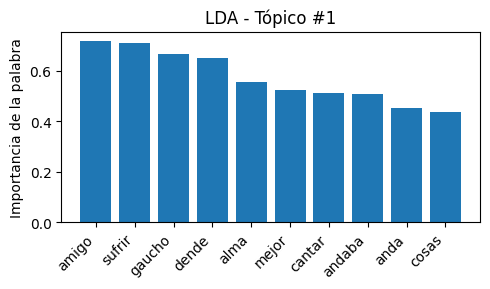

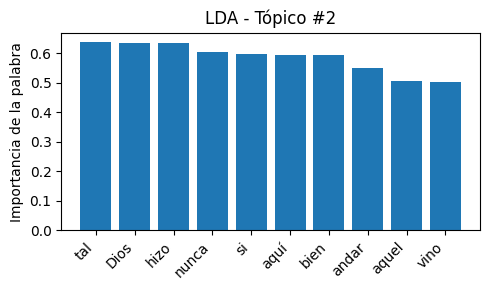

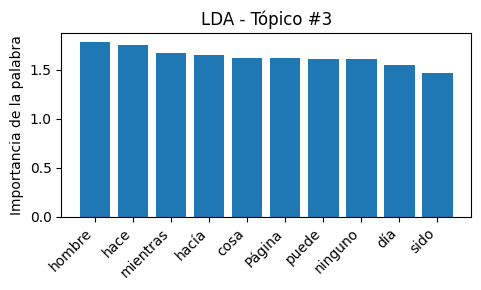

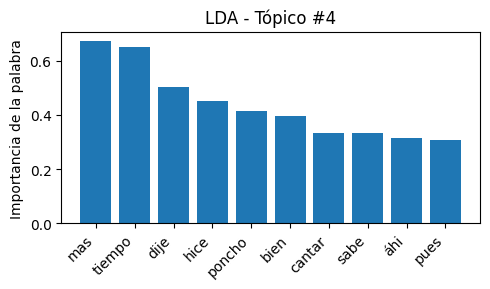

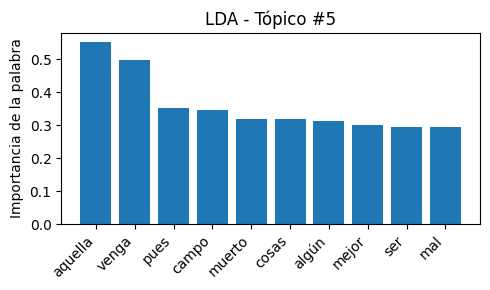

In [ ]:
# Definir una función para graficar los resultados con figuras más pequeñas
def graficar_topicos(modelo, modelo_nombre, num_top_words=10):

  for topic_idx, topic in enumerate(modelo.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [modelo_2Vec.wv.index_to_key[i] for i in top_words_idx]

    plt.figure(figsize=(5, 3))  # Ajustar el tamaño de la figura (ancho, alto)
    plt.bar(top_words, topic[top_words_idx])
    plt.title(f'{modelo_nombre} - Tópico #{topic_idx + 1}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Importancia de la palabra')
    plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
    plt.show()

# Llamar a la función para graficar los resultados de LDA y NMF
graficar_topicos(lda, 'LDA')
graficar_topicos(nmf, 'NMF')

### Conclusión de los tópicos generados por ambos modelos sobre el libro Martín Fierro.

El análisis de los tópicos nos muestra temas recurrentes y palabras que reflejan emociones y situaciones que atraviesa el protagonista, Martín Fierro y su entorno.
A continuación, se hace una interpretacion de lo que podrían significar los tópicos destacados:

Amistad, sufrimiento y la vida del gaucho: Palabras como "amigo", "pobre", "sufrir" y "gaucho" se refleja el tema central del Martín Fierro: la representación de la vida marginal del gaucho en lucha por su dignidad.


Hombre y acción: Con palabras como "hombre", "hace", "cosa" y "puede", se destacan las acciones, responsabilidades y decisiones de los individuos, posiblemente reflejando la filosofía de vida de Martín Fierro.


Campo y adversidades: Palabras como "campo", "muerto", y "mal" resaltan el entorno físico y los desafíos que enfrenta el protagonista, destacando el ambiente rural como escenario principal.





### En general, ambos modelos capturan temas clave como la vida del gaucho, sus luchas sociales, su relación con la naturaleza y el tiempo, y la búsqueda de justicia y libertad. Estos tópicos refuerzan la importancia cultural y literaria de Martín Fierro como un retrato de la identidad argentina del siglo XIX.